In [1]:
# Imports
import pandas as pd
import durak
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
def play_multiple(
    num_games, 
    verbose = False,
    num_suits = 3,
    num_cards_per_suit = 3,
    num_starting_cards = 2
    ):

    strategies = {
        "player1" : "random",
        "player2" : "random",
        "player3" : "random"
    }

    knowledge_depths = {
        "player1" : 1,
        "player2" : 1,
        "player3" : 1
    }

    data = {}

    for i in range(num_games):
        model = durak.DurakModel(
            verbose = verbose, 
            num_suits = num_suits, 
            num_cards_per_suit = num_cards_per_suit, 
            num_starting_cards = num_starting_cards
            )

        data["game" + str(i)] = durak.play(model)


    return data

In [3]:
data = play_multiple(1000, verbose= False)
df = pd.DataFrame.from_dict(data, orient="index")
df

,num_players,num_suits,num_cards_per_suit,num_starting_cards,durak,winners,player_strategies,player_depths
game0,3,3,3,2,0,"[1, 2]",[],[]
game1,3,3,3,2,0,"[1, 2]",[],[]
game2,3,3,3,2,2,"[0, 1]",[],[]
game3,3,3,3,2,1,"[0, 2]",[],[]
game4,3,3,3,2,2,"[0, 1]",[],[]
...,...,...,...,...,...,...,...,...
game995,3,3,3,2,1,"[2, 0]",[],[]
game996,3,3,3,2,1,"[0, 2]",[],[]
game997,3,3,3,2,1,"[2, 0]",[],[]
game998,3,3,3,2,1,"[2, 0]",[],[]


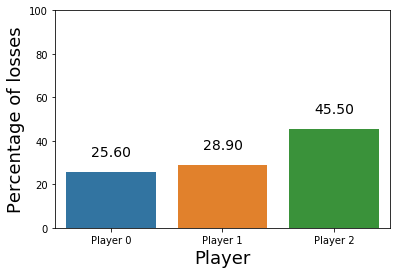

In [4]:
"""
Percentage of losses per player
"""

fig, ax = plt.subplots()
durak_percentages = [x/len(df)*100 for x in list(Counter(df["durak"]).values())]
players = sorted(list(df.durak.unique()))

g = sns.barplot(x=players, y=durak_percentages, dodge=False)
g.set_xlabel("Player", fontsize=18)
g.set_xticklabels(["Player " + str(x) for x in players])

g.set_ylabel("Percentage of losses", fontsize=18)

ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0, 100) #To make space for the annotations

[9, 55.0, 71.0, 74.0]
[12, 61.0, 72.0, 67.0]
[15, 61.0, 65.0, 74.0]
[18, 70.0, 58.0, 72.0]
[21, 64.0, 66.0, 70.0]
[24, 63.0, 63.0, 74.0]
[27, 65.0, 67.0, 68.0]
[30, 65.0, 74.0, 61.0]
[33, 62.0, 69.0, 69.0]
[36, 76.0, 59.0, 65.0]
[39, 65.0, 66.0, 69.0]


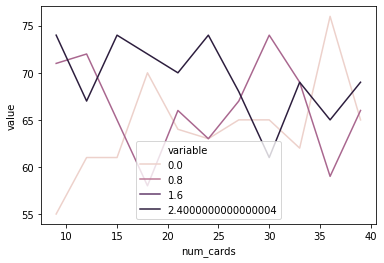

In [17]:
"""
Influence of total number of cards on the effectiveness of depth
"""

num_total_cards = [] 
columns = ["num_cards"]
players = sorted(list(df.durak.unique()))
columns.extend(players)
wins_per_num_cards = []
num_suits = 3

# We keep it at 3 suits (?), but loop over the number of cards per suit
for num in range(3,14):

    num_total_cards.append(num)

    data = play_multiple(100, verbose= False, num_cards_per_suit=num, num_suits=num_suits)
    df = pd.DataFrame.from_dict(data, orient="index")
    win_percentages = [100 - (x/len(df)*100) for x in list(Counter(df["durak"]).values())]

    li = [num_suits * num]
    li.extend(win_percentages)
    wins_per_num_cards.append(li)
    print(li)

wins_per_num_cards

df2 = pd.DataFrame(wins_per_num_cards, columns=columns)
df2

sns.lineplot(x="num_cards", y="value",
             hue="variable",
             data = pd.melt(df2, ["num_cards"]))